In [ ]:
import math

def P_0(y, N, M):
  result = 1
  for i in range(1, N+1):
    result = result + (y**i)/math.factorial(i)
  result = result + (y**(N+1))/(N*math.factorial(N)) * (1-(y/N)**M)/(1-y/N)
  return 1/result

def compute_l(y, N, M, p0):
  temp1 = (y * y**N)/(N * math.factorial(N))
  temp2 = 1 - (y/N)**M
  temp3 = M + 1 - M/N*y
  temp4 = (1 - y/N)**2
  return abs(temp1 * temp2 * temp3 / temp4 * p0)

N = int(input("Введите количество мастеров (каналов) N: "))
M = int(input("Введите количество мест в зале ожидания (длина очереди) M: "))

# Интенсивность в заявках/час, время обслуживания в минутах
λ = float(input("Введите интенсивность входящего потока λ: "))
T_ob = float(input("Введите среднее время обслуживания T_ob: ")) / 60
μ = 1/T_ob
y = λ/μ

print("\nИнтенсивность потока обслуживания μ -", round(μ, 3),
      "\nОбслуженных заявок в ед. времени y -", round(y, 3),
)

p0 = P_0(y, N, M)
P_otk = p0 * (y**(N+M))/(math.factorial(N) * N**M)
Q = 1 - P_otk
λ_ = λ * Q
K_chn = λ_ / μ
L_och = compute_l(y, N, M, p0)
w = L_och / λ
m = L_och + K_chn
u = m / λ

print("\np0 -", round(p0, 3),
      "\nВероятность отказа π -", round(P_otk, 3),
      "\nОтносительная пропускная способность Q -", round(Q, 3),
      "\nАбсолютная пропускная способность λ′ -", round(λ_, 3),
      "\nСреднее число занятых каналов k_зан -", round(K_chn, 3),
      "\nСреднее число заявок, находящихся в очереди l -", round(L_och, 3),
      "\nСреднее время ожидания в очереди w -", round(w, 3),
      "\nСреднее число заявок в системе m -", round(m, 3),
      "\nСреднее время пребывания заявки в СМО u -", round(u, 3),
)

Введите количество мастеров (каналов) N: 3
Введите количество мест в зале ожидания (длина очереди) M: 3
Введите интенсивность входящего потока λ: 24
Введите среднее время обслуживания T_ob: 4

Интенсивность потока обслуживания μ - 15.0 
Обслуженных заявок в ед. времени y - 1.6

p0 - 0.191 
Вероятность отказа π - 0.02 
Относительная пропускная способность Q - 0.98 
Абсолютная пропускная способность λ′ - 23.524 
Среднее число занятых каналов k_зан - 1.568 
Среднее число заявок, находящихся в очереди l - 0.651 
Среднее время ожидания в очереди w - 0.027 
Среднее число заявок в системе m - 2.22 
Среднее время пребывания заявки в СМО u - 0.092


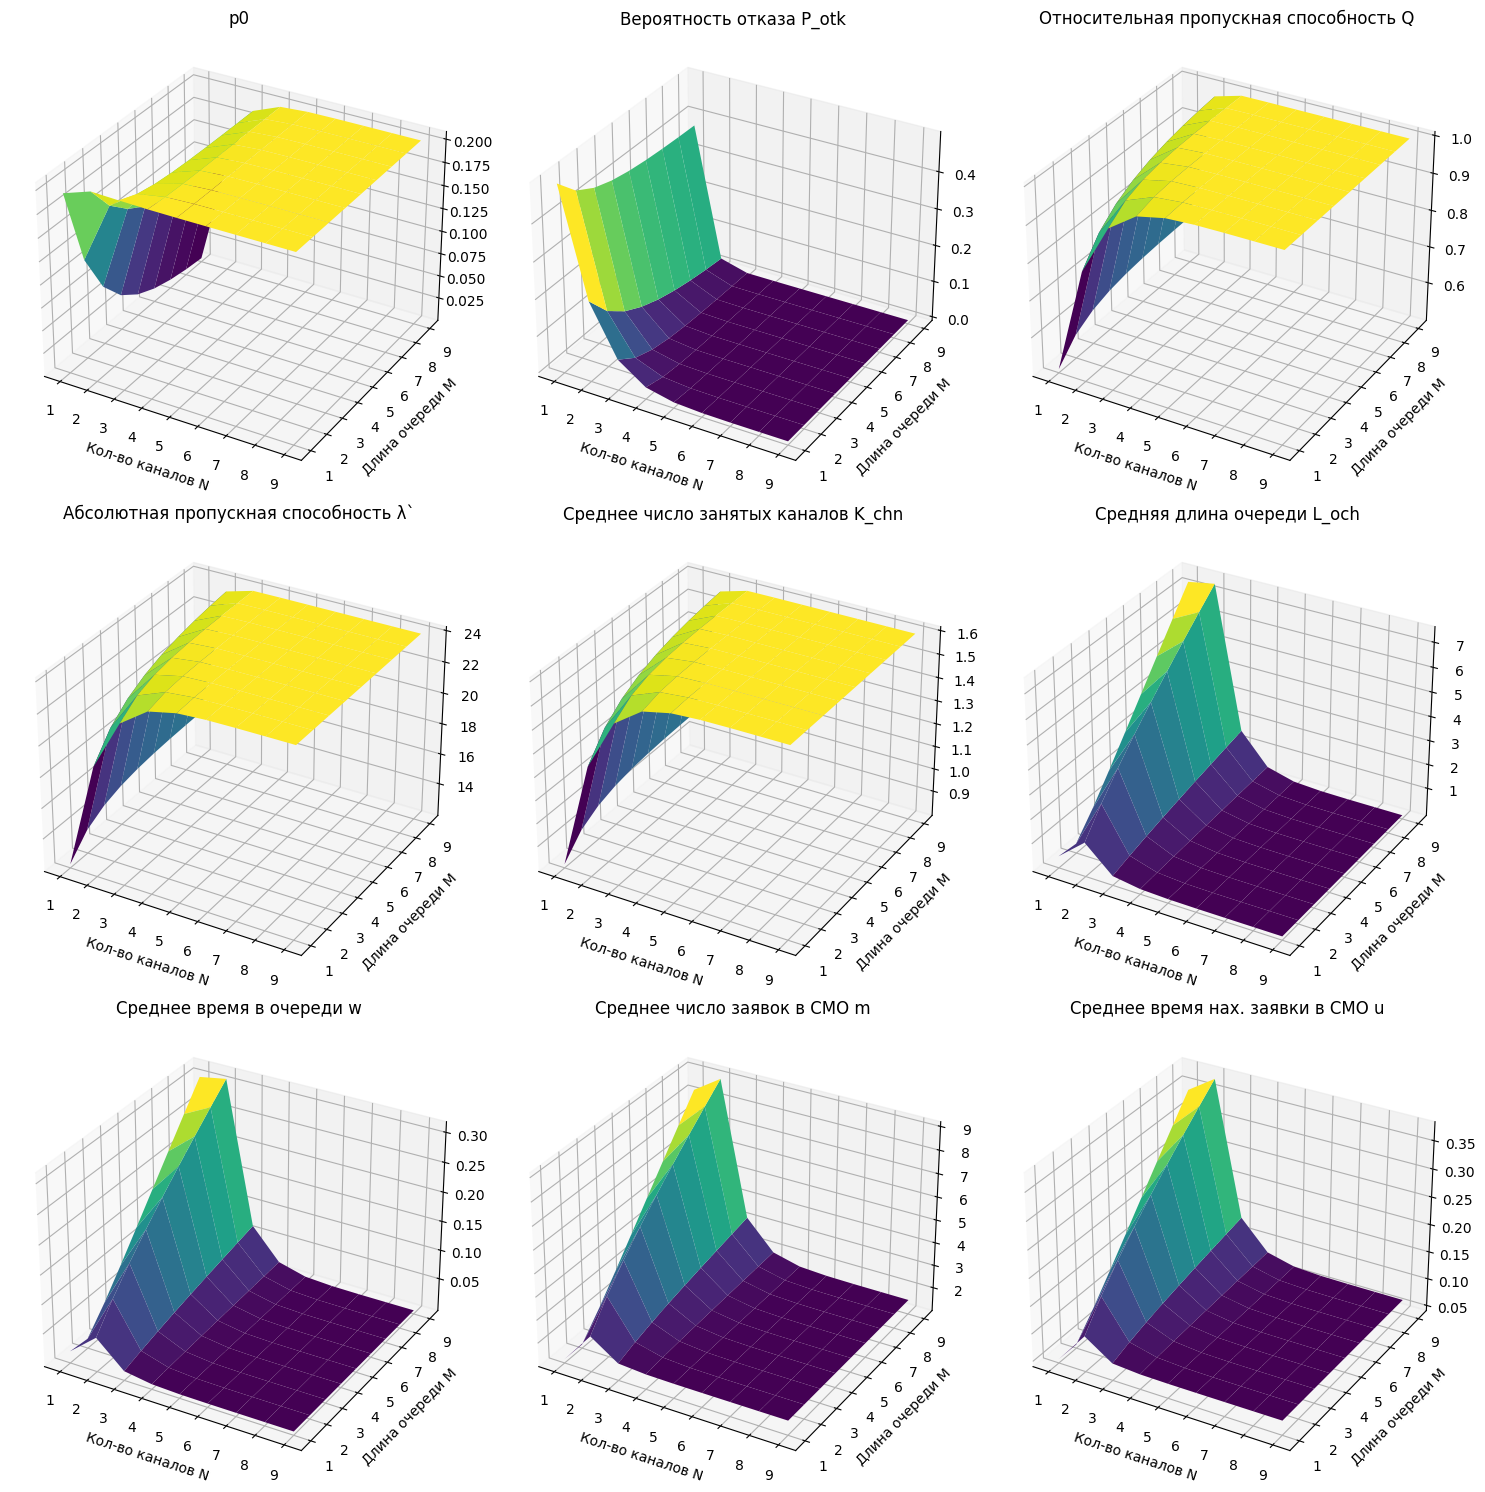

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def get_params(N, M):
  # print(y, N, M)
  p0 = P_0(y, N, M)
  P_otk = p0 * (y**(N+M))/(math.factorial(N) * N**M)
  Q = 1 - P_otk
  λ_ = λ * Q
  K_chn = λ_ / μ
  L_och = compute_l(y, N, M, p0)
  w = L_och / λ
  m = L_och + K_chn
  u = m / λ
  return p0, P_otk, Q, λ_, K_chn, L_och, w, m, u

# Диапазон для N и M
Nr = np.arange(1, 10, 1)
Mr = np.arange(1, 10, 1)
N, M = np.meshgrid(Nr, Mr)

p0_values, P_otk_values, Q_values, λ__values, K_chn_values, L_och_values, w_values, m_values, u_values = np.vectorize(get_params)(N, M)
values_list = [p0_values, P_otk_values, Q_values, λ__values, K_chn_values, L_och_values, w_values, m_values, u_values]
names = ['p0', 'Вероятность отказа P_otk', 'Относительная пропускная способность Q',
         'Абсолютная пропускная способность λ`', 'Среднее число занятых каналов K_chn', 'Средняя длина очереди L_och',
         'Среднее время в очереди w', 'Среднее число заявок в СМО m', 'Среднее время нах. заявки в СМО u']

fig = plt.figure(figsize=(15, 15))

for i, values in enumerate(values_list):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')  # Создаем subplot в 3x3 сетке
    z_values = values
    ax.plot_surface(N, M, z_values, cmap='viridis')
    ax.set_xlabel('Кол-во каналов N')
    ax.set_ylabel('Длина очереди M')
    ax.set_title(names[i])

plt.tight_layout()
plt.show()